# One day processing
This file contains codes to visualize and analyze data within one day

### Load the packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle

### This function turns a list into dict and count the appearance of a value and put into dict value

In [2]:
def list2dic(l): 
    dic = {} 
    for item in l: 
        if (item in dic): 
            dic[item] += 1
        else: 
            dic[item] = 1
    return dic

### This function counts the number of tweets of csv file

In [3]:
def count_tweet(day,apple):
    if day<10:
        day="0"+str(day)
    else:
        day=str(i)
    prefix="data/2020-04-"
    rec_24=[]
    rec_7=0
    with open(prefix+day+["","appledata"][apple]+".csv", newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time=row[1]
            time_24h=time.split(" ")[3]
            time_7d=time.split(" ")[0]
            rec_24.append(time_24h[:2])
            rec_7+=1
        times=list2dic(rec_24)
        print(prefix+day+["","appledata"][apple]+".csv",rec_7)
        with open('timerec.txt', 'a') as f:
            f.write(prefix+day+["","appledata"][apple]+".csv"+" : "+str(rec_7)+"\n")
            f.write(str(times))
            f.write("\n")
        

### Count each day's tweets

In [4]:
for i in range(1,12):
    count_tweet(i,0)    
    count_tweet(i,1)

data/2020-04-01.csv 635684
data/2020-04-01appledata.csv 125242
data/2020-04-02.csv 723579
data/2020-04-02appledata.csv 140064
data/2020-04-03.csv 831830
data/2020-04-03appledata.csv 147643
data/2020-04-04.csv 681234
data/2020-04-04appledata.csv 134385
data/2020-04-05.csv 627547
data/2020-04-05appledata.csv 154937
data/2020-04-06.csv 704269
data/2020-04-06appledata.csv 189055
data/2020-04-07.csv 735742
data/2020-04-07appledata.csv 145710
data/2020-04-08.csv 550869
data/2020-04-08appledata.csv 108586
data/2020-04-09.csv 682690
data/2020-04-09appledata.csv 148856
data/2020-04-10.csv 701884
data/2020-04-10appledata.csv 200278
data/2020-04-11.csv 658860
data/2020-04-11appledata.csv 196187


### This function read 2 files of one day, split the tweets according to the dict on their created time, then draw the graph according to the dict, total tweets as blue line and apple as red

In [5]:
def vis(day):
    if day<10:
        day="0"+str(day)
    else:
        day=str(day)
    prefix="data/2020-04-"
    rec_24=[]
    with open(prefix+day+".csv", newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time=row[1]
            time_24h=time.split(" ")[3]
            rec_24.append(time_24h[:2])
        times_nor=list2dic(rec_24)
    rec_24=[]
    rec_7=0
    with open(prefix+day+"appledata"+".csv", newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time=row[1]
            time_24h=time.split(" ")[3]
            time_7d=time.split(" ")[0]
            rec_24.append(time_24h[:2])
            rec_7+=1
        times_app=list2dic(rec_24)
        
    list1 = sorted(times_nor.items())
    x, y = zip(*list1)
    plt.plot(x, y,'#45a8fe')
    
    list2 = sorted(times_app.items())
    a, b = zip(*list2)
    plt.plot(a, b,'#ff0000')   
    plt.title(prefix+day)
    plt.show()
    

### Call the visalize function

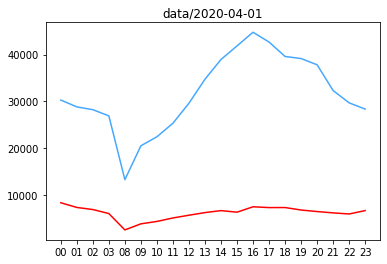

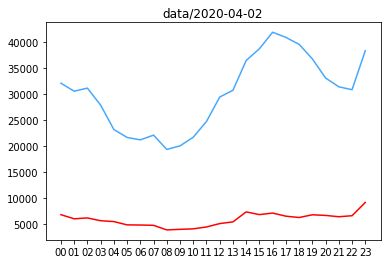

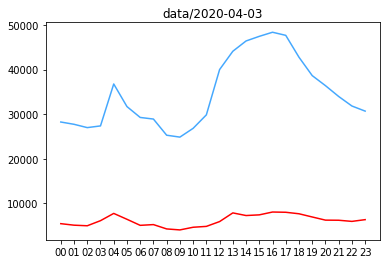

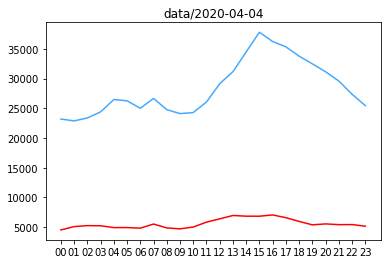

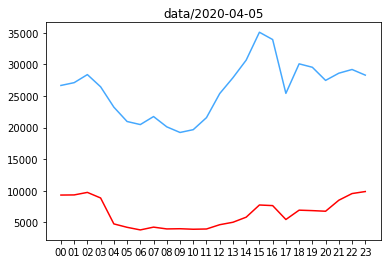

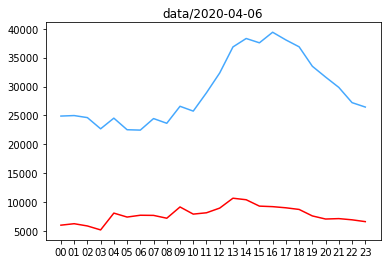

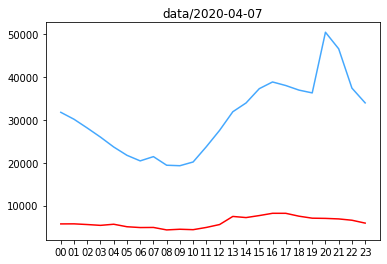

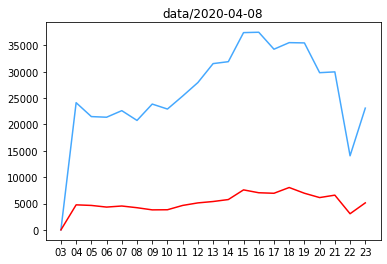

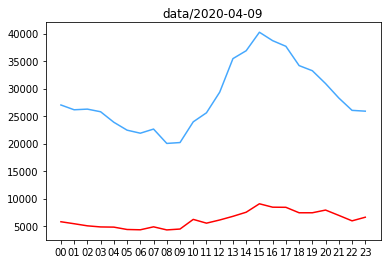

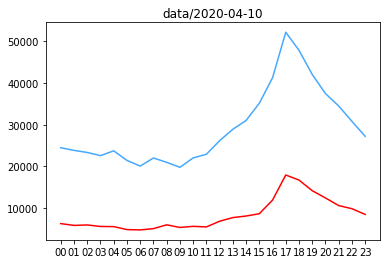

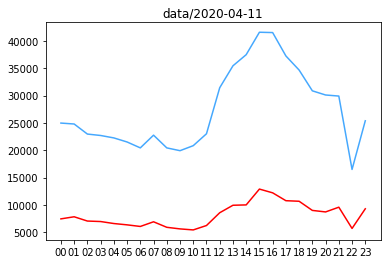

In [6]:
for i in range(1,12):
    vis(i)

### This function reads the files of one day, calculate every hour apple topic's ratio in total tweets and draw the graph

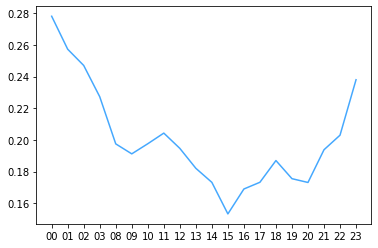

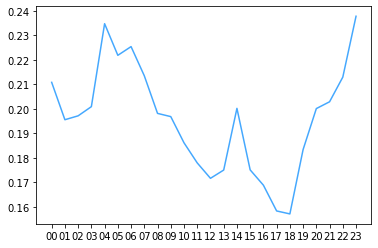

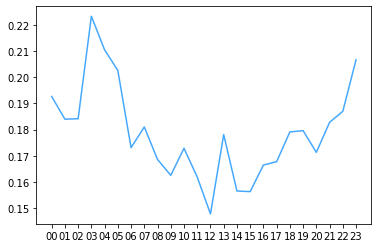

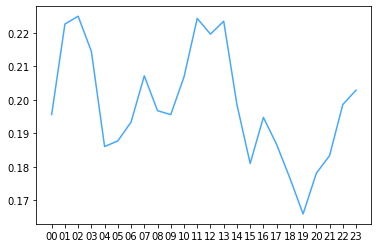

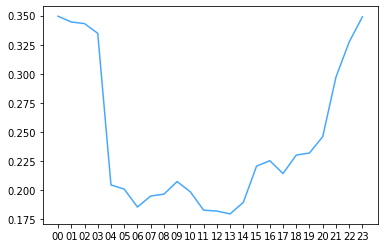

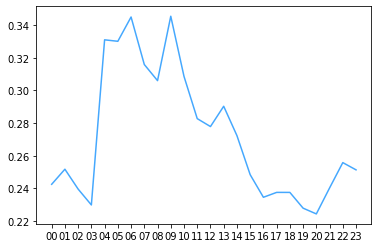

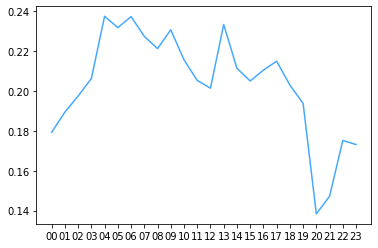

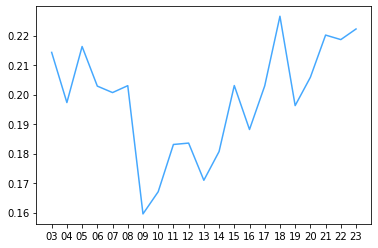

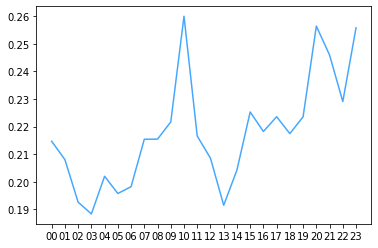

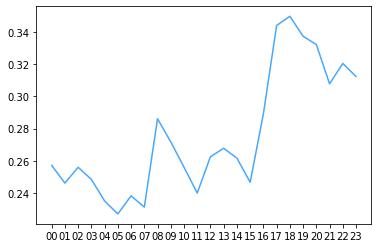

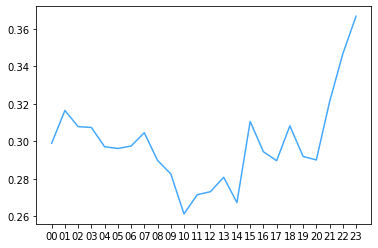

In [7]:
def vis_ratio(day):
    if day<10:
        day="0"+str(day)
    else:
        day=str(day)
    prefix="data/2020-04-"
    rec_24=[]
    with open(prefix+day+".csv", newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time=row[1]
            time_24h=time.split(" ")[3]
            rec_24.append(time_24h[:2])
        times_nor=list2dic(rec_24)
    rec_24=[]
    rec_7=0
    with open(prefix+day+"appledata"+".csv", newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time=row[1]
            time_24h=time.split(" ")[3]
            time_7d=time.split(" ")[0]
            rec_24.append(time_24h[:2])
            rec_7+=1
        times_app=list2dic(rec_24)
        
    list1 = sorted(times_nor.items())
    x, y = zip(*list1)
    y=list(y)
    list2 = sorted(times_app.items())
    a, b = zip(*list2)
    b=list(b)
    res = [int(i)/int(j) for i,j in zip(b, y)] 
    plt.plot(x, res,'#45a8fe')   
    plt.show()
    
for i in range(1,12):
    vis_ratio(i)

### This function counts the average follower of one day's tweet user

In [8]:
def fol_count(day,apple):
    if day<10:
        day="0"+str(day)
    else:
        day=str(day)
    prefix="data/2020-04-"
    fow=0
    user=0
    with open(prefix+day+["","appledata"][apple]+".csv", newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if apple==1:                
                fow+=int(row[3])
                user+=1
            else:
                if "apple" not in row[2].lower():
                    fow+=int(row[3])
                    user+=1
                else:
                    pass
        avg=fow/user
    print("Average followers number for "+prefix+day+" "+["average","apple average"][apple]+" is "+str(avg))
    return avg
            
            

In [9]:
fol_count(3,0)

Average followers number for data/2020-04-03 average is 7685.569204829229


7685.569204829229

### Store each day's average followers then draw the graph

Average followers number for data/2020-04-01 average is 8058.233693337417
Average followers number for data/2020-04-01 apple average is 8295.353331949345
Average followers number for data/2020-04-02 average is 7899.072556320629
Average followers number for data/2020-04-02 apple average is 9548.289710418094
Average followers number for data/2020-04-03 average is 7685.569204829229
Average followers number for data/2020-04-03 apple average is 8690.67989677804
Average followers number for data/2020-04-04 average is 5121.623482984796
Average followers number for data/2020-04-04 apple average is 6197.792156862745
Average followers number for data/2020-04-05 average is 5071.230314571791
Average followers number for data/2020-04-05 apple average is 5556.888348167319
Average followers number for data/2020-04-06 average is 7948.831683254865
Average followers number for data/2020-04-06 apple average is 7445.6878104255375
Average followers number for data/2020-04-07 average is 8088.493771195509
Av

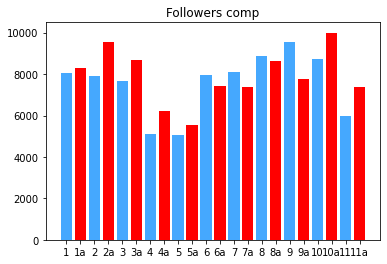

In [10]:
fol_dic={}
for i in range(1,12):
    fol_dic[i]=fol_count(i,0)
    fol_dic[str(i)+"a"]=fol_count(i,1)
    
plt.bar(range(len(fol_dic)), fol_dic.values(), color=['#45a8fe','red'])
plt.xticks(range(len(fol_dic)), list(fol_dic.keys()))
plt.title("Followers comp")
plt.show()

### This function calculates the retweet, reply and original content of total and apple tweets, calculate the ratio and draw a pie chart

In [11]:
def interact(day,apple):
    if day<10:
        day="0"+str(day)
    else:
        day=str(i)
    prefix="data/2020-04-"
    total=0
    rts=0
    rps=0
    with open(prefix+day+["","appledata"][apple]+".csv", newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            tweet_text=row[2]
            if "RT" in tweet_text:
                rts+=1
            if row[4]!="":
                rps+=1
            total+=1
    unr=total-rts-rps

    labels = "RTs","Reply","Unrelated"
    sizes = [rts,rps,unr]

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.0f%%',shadow=False, startangle=90)
    ax1.axis('equal')
    plt.title(prefix+day+["","appledata"][apple]+".csv")
    plt.show()
                       
def comp_compare(day):
    interact(day,0)
    interact(day,1)
    

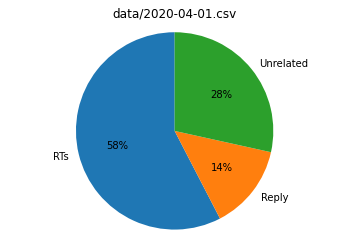

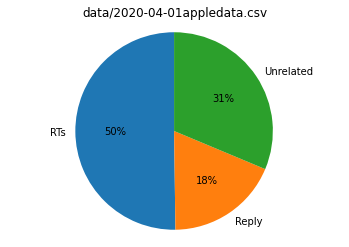

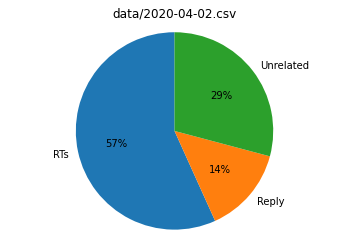

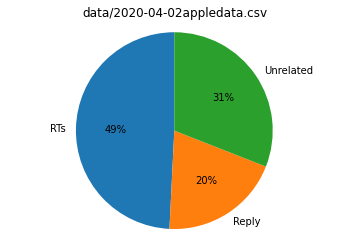

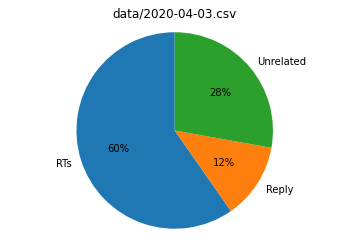

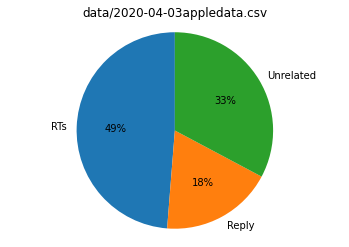

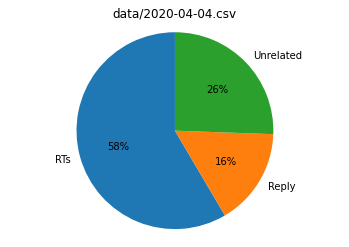

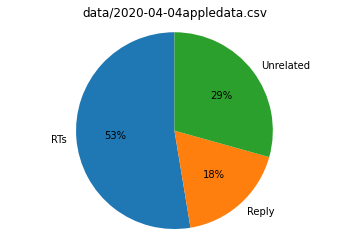

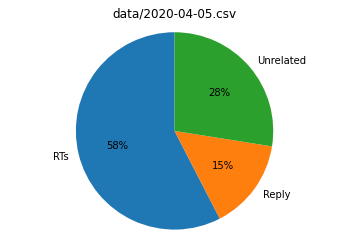

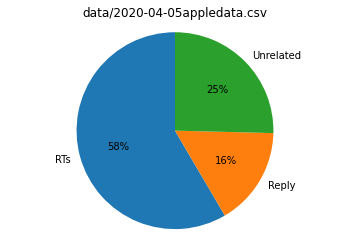

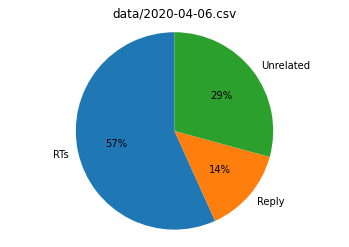

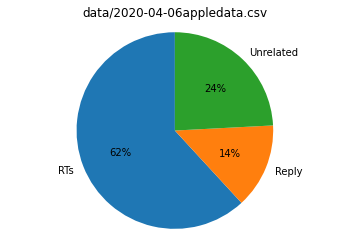

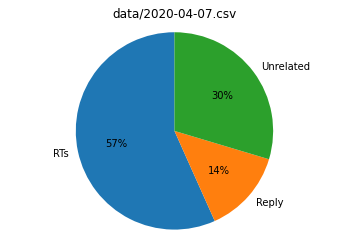

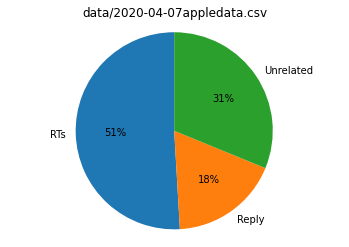

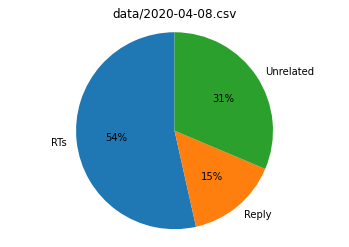

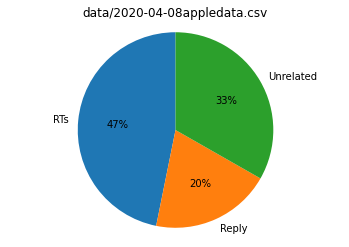

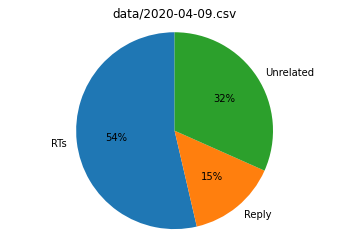

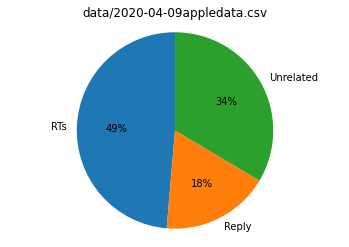

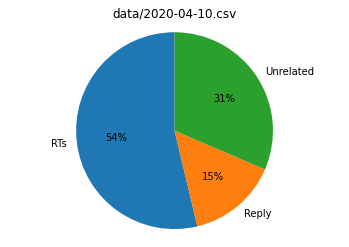

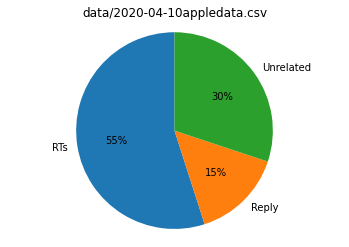

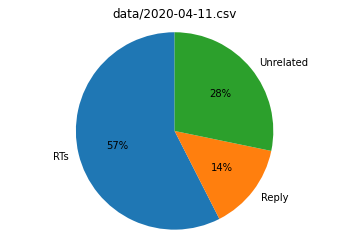

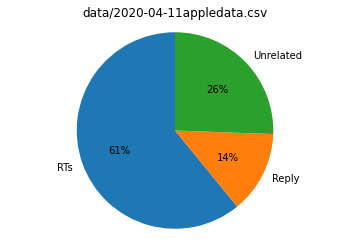

In [12]:
for i in range(1,12):
    comp_compare(i)